In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = {
    "height": [
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
        190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
        150, 152, 154, 156, 158, 160, 162, 164, 166, 168,
        170, 172, 174, 176, 178, 180, 182, 184, 186, 188,
        151, 153, 155, 157, 159, 161, 163, 165, 167, 169,
        171, 173, 175, 177, 179, 181, 183, 185, 187, 189
    ],
    "weight": [
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
        52, 54, 55, 57, 59, 60, 62, 63, 65, 67,
        68, 70, 72, 73, 75, 77, 78, 80, 82, 83,
        51, 53, 55, 56, 58, 60, 61, 63, 65, 66,
        68, 70, 71, 73, 75, 76, 78, 80, 81, 83
    ]
}


In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,height,weight
0,150,50
1,151,51
2,152,52
3,153,53
4,154,54


I want to predict hight using weight

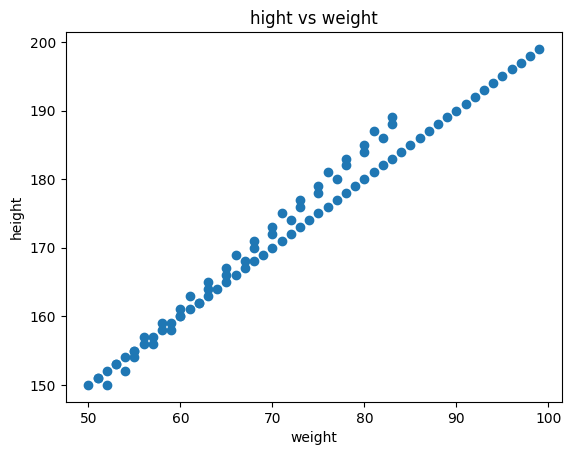

In [5]:
#scatter plot

plt.scatter(df["weight"],df["height"])
plt.xlabel("weight")
plt.ylabel("height")
plt.title("hight vs weight")
plt.show()

In [6]:
# correlation
df.corr()

,height,weight
height,1.000000,0.991635
weight,0.991635,1.000000


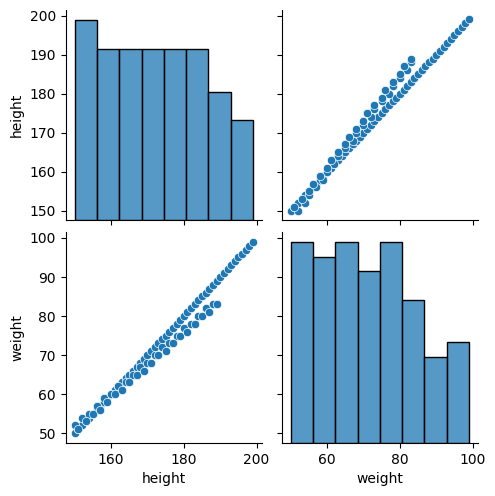

In [7]:
import seaborn as sns
sns.pairplot(df)

In [14]:
X = df[['weight']]
type(X)


pandas.core.frame.DataFrame

In [15]:
y = df["height"]

Train and test split

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
X_test.shape

(27, 1)

Scaling 

In [21]:
#Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

Apply the linear regression (Simple linear regression)

In [23]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()



In [24]:
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


ht(x) = t0 + ht1

In [26]:
print("Coefficeint or slope :", regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficeint or slope : [13.30035446]
Intercept:  171.9206349206349


Plot training data 

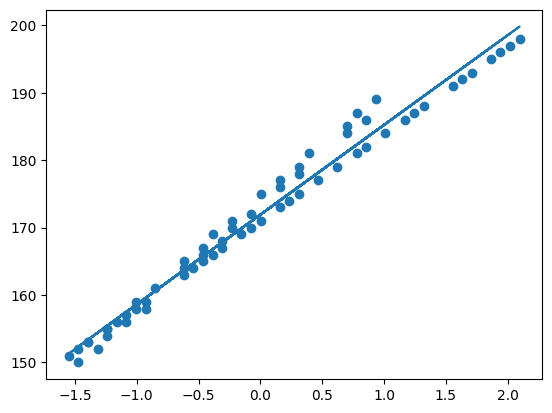

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

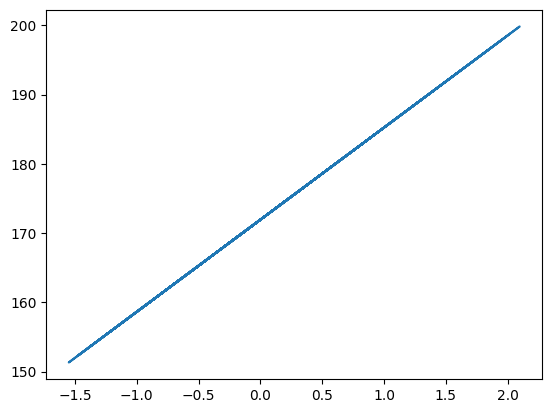

In [30]:
plt.plot(X_train,regression.predict(X_train))

Prediction with test data

In [29]:
y_pred = regression.predict(X_test)

Performance metrics

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse) # root mean squared error

print(mse)
print(mae)
print(rmse)

2.5929300935433894
1.3358914382242875
1.6102577723903058


R Square

R^2 = 1 - SSR/SST
R^2 = coefficient of determination SSR, SSR = Sum of squares of residuals, SST = total sum of squares

In [33]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [34]:
score

0.9857839896049131

Adjusted R2

R2 = 1- [(1-R2)*(N-1)/(N-k-1)]

In [35]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9852153491891096